In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import os
import json
import time

from numpy.random import randn
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20
import seaborn as sns
from IPython.display import display

# Necessary to import modules from top-level directory since we want to isolate notebooks in a sub folder
import sys  
sys.path.insert(0, os.path.abspath(os.path.join('..')))
import m4helpers

In [3]:
train_h, test_h = m4helpers.load_dataset(m4helpers.Datasets.Hourly)

In [17]:
def get_dataset(idx): 
    return m4helpers.trim(train_h, idx), test_h.iloc[idx, ]

In [18]:
import pmdarima as pm

In [19]:
train_h0, test_h0 = get_dataset(0)

In [20]:
train_h0.shape, test_h0.shape

((700,), (48,))

In [34]:
a = time.perf_counter()

time.sleep(2)

b = time.perf_counter()

print("Training time: {0:0.4f} seconds".format(b - a))

Training time: 2.0055 seconds


In [43]:
def find_and_test_auto_arima_model(train, test, seasonal, m, n_jobs=1):
    # Plot the original data
    total_len = train.shape[0] + test.shape[0]
    x = np.arange(total_len)
    plt.plot(x[:train.shape[0]], train, c='blue')
    plt.plot(x[train.shape[0]:], test, c='green')
    plt.title("Training and test datasets")
    plt.show()
    
    # Fit your model
    bfit = time.perf_counter()
    model = pm.auto_arima(train, error_action="ignore", seasonal=seasonal, m=m, n_jobs=n_jobs)
    afit = time.perf_counter()
    
    print("Training time: {0:0.4f} seconds".format(afit - bfit))
    
    # make your forecasts
    bpred = time.perf_counter()
    forecasts = model.predict(test.shape[0])  # predict N steps into the future
    apred = time.perf_counter()
    
    print("Predict time: {0:0.4f} seconds".format(apred - bpred))
    
    # Visualize the forecasts (blue=train, green=forecasts)
    total_len = train.shape[0] + test.shape[0]
    x = np.arange(total_len)
    plt.plot(x[:train.shape[0]], train, c='blue')
    plt.plot(x[train.shape[0]:], forecasts, c='green')
    plt.title("Train dataset and forecasted values")
    plt.show()
    
    return model

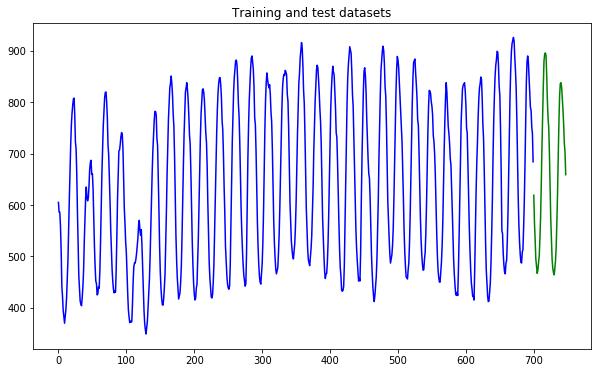

/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maxim

Training time: 498.1945 seconds
Predict time: 0.0308 seconds


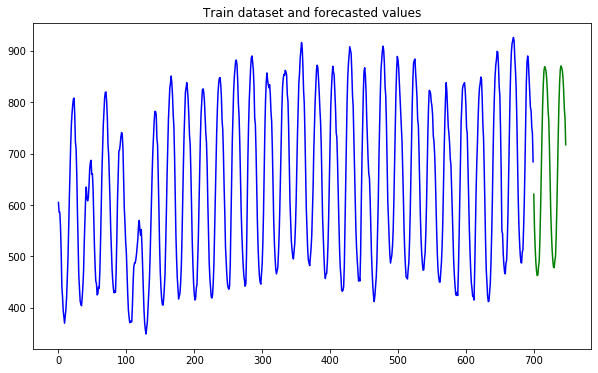

In [36]:
# Interesting note: 24 is daily frequency since the sampling is every hour. frequency = 12 had visually similar 
# results and was way way faster to compute. Worth investigating the difference in precision.

find_and_test_auto_arima_model(train_h0, test_h0, seasonal=True, m=24)

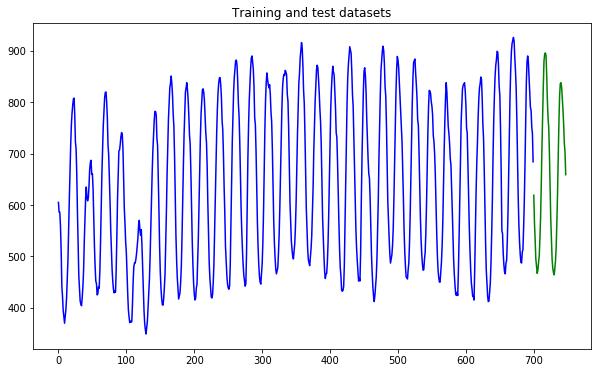

/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed

Training time: 82.0364 seconds
Predict time: 0.0106 seconds


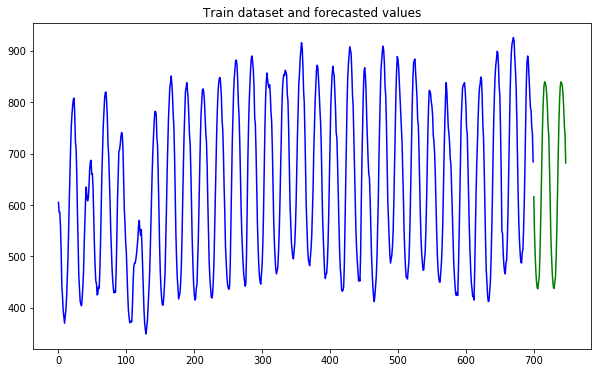

In [37]:
# Interesting note: frequency = 12 has visually similar prediction and is 6x faster to train 
# Worth investigating the difference in precision.

find_and_test_auto_arima_model(train_h0, test_h0, seasonal=True, m=12)

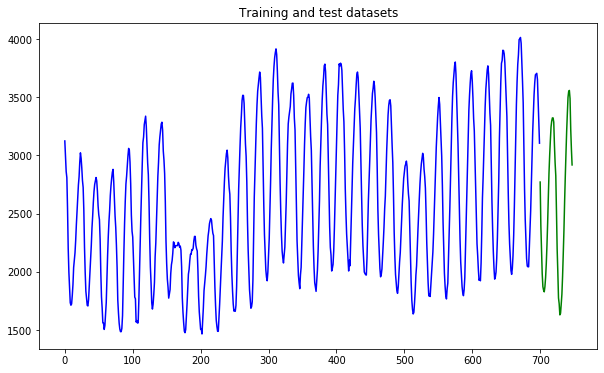

/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/djoly/anaconda3/li

Training time: 120.1057 seconds
Predict time: 0.0422 seconds


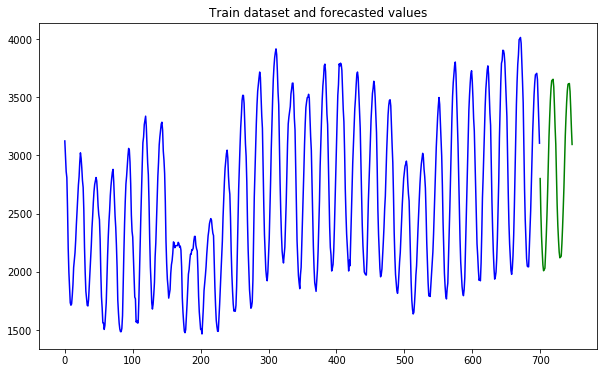

In [40]:
train_h1, test_h1 = get_dataset(1)
mh1 = find_and_test_auto_arima_model(train_h1, test_h1, seasonal=True, m=12)

In [41]:
mh1

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(2, 0, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend=None,
      with_intercept=True)

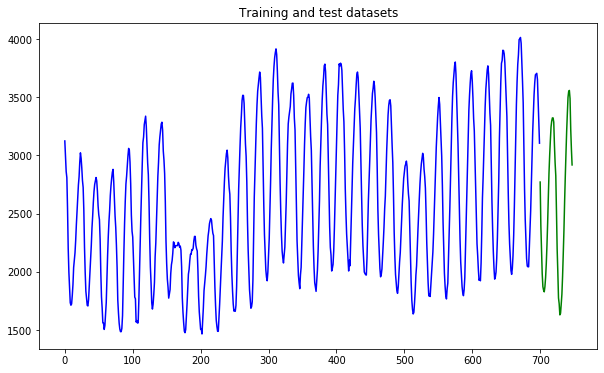

/Users/djoly/anaconda3/lib/python3.7/site-packages/pmdarima/arima/auto.py:229: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/djoly/anaconda3/lib/python3.7/si

/Users/djoly/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Training time: 123.8108 seconds
Predict time: 0.0073 seconds


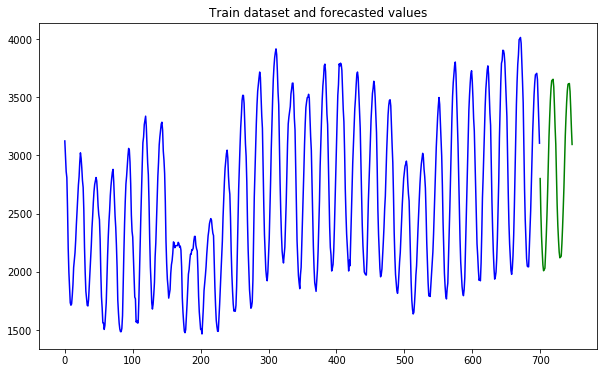

In [44]:
# Looks like 
train_h1, test_h1 = get_dataset(1)
mh1 = find_and_test_auto_arima_model(train_h1, test_h1, seasonal=True, m=12, n_jobs=-1)